# Import Libraries

In [199]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

# Linear Regression Model

In [200]:
alpha=0.0001
max_iterations=1000000

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    #b = np.zeros((1,))
    b = np.zeros((1,))

    return w, b

def h(w,b,x):
    y_pred = np.dot(x,w) + b
    return y_pred

def cost(w, b, x, y,y_pred ):
    m= x.shape[0]
    j= np.sum((y_pred-y)**2)/(2*m)
    return j

def gradient(x, y,y_pred ):
    m = x.shape[0]
    res = y_pred- y
    dw = 1/m * np.dot(x.T,res)
    db = 1/m * np.sum(res)
    return dw,db

def update_parameters(w,b,dw,db,alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return w,b

def model(x,y):
    loss = []

    w,b = initialize_with_zeros(x.shape[1])
    for i in range(max_iterations) :
        y_pred=h(w,b,x)
        #res= y_pred- y
        j = cost(w,b, x, y,y_pred )
        loss.append(j)
        dw, db = gradient(x, y,y_pred)
        w,b = update_parameters(w,b , dw,db,  alpha)
        
    return w,b,loss

def my_r2_score(y,y_pred):
    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2_score = 1 - (ssr/sst)
    return r2_score


# Univariate Model

w,b [[0.69472416]] [1.43286332]
my r2 score 0.8213156084065661


Text(0, 0.5, 'Loss')

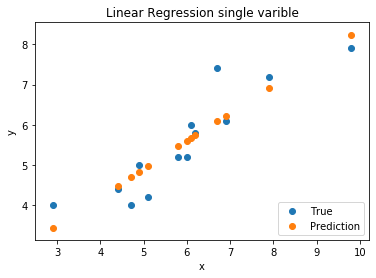

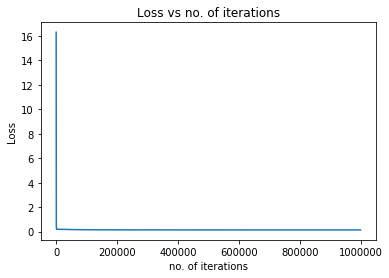

In [201]:
data = pd.read_csv("RegData.csv", header=None).to_numpy()
x = np.array(data[:, 0]).reshape((data.shape[0]),1)
y = np.array(data[:, 1]).reshape((data.shape[0]),1)
w,b,loss = model(x,y)
print("w,b",w,b)


r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)


plt.scatter(x, y)
plt.scatter(x, h(w,b,x))
fig1 = plt.figure(1)
plt.title("Linear Regression single varible")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

fig2 = plt.figure(2)
plt.plot(np.arange(len(loss)),loss)
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")



In [202]:
#Checking using SKLEARN

reg = linear_model.LinearRegression()
reg.fit(x, y)
print('Coefficients: ', reg.coef_)
y_predicted=reg.predict(x)
r1 = r2_score(y, y_predicted)
print("slkr2 score",r1)


Coefficients:  [[0.69452919]]
slkr2 score 0.8213156778363775


# Mltivariate Model

In [203]:
data2 = pd.read_csv("MultipleLR.csv", header=None)
x2 = np.array(data2.iloc[:, 0:-1])
y2 = np.array(data2.iloc[:, 1]).reshape((data2.shape[0]), 1)

w2, b2 ,loss2= model(x2, y2)
print("w2,b2", w2, b2)



w2,b2 [[ 4.35678211e-09]
 [ 9.99998855e-01]
 [-3.79913235e-06]] [0.00040812]


In [204]:
r2=r2_score(y2, h(w2,b2,x2))
print("r2 score",r2)



r2 score 0.9999999999786005


Text(0, 0.5, 'Loss')

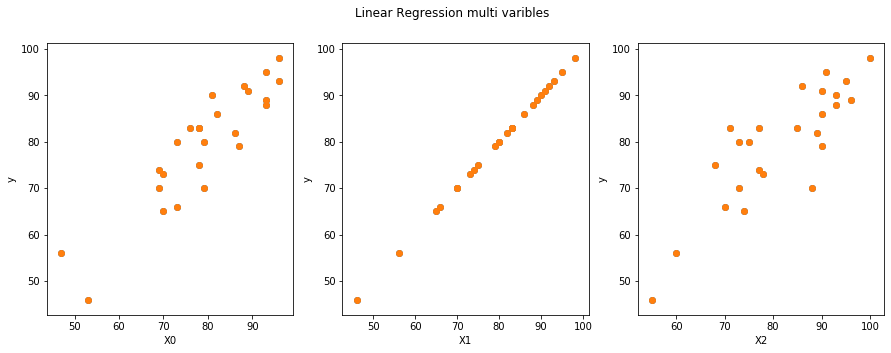

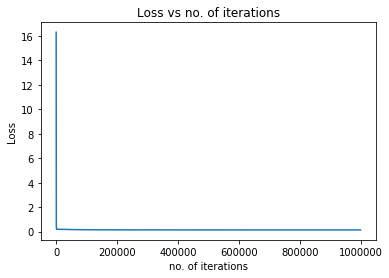

In [205]:

fig, a = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Linear Regression multi varibles")

a[0].scatter(x2[:,0], y2)
a[0].scatter(x2[:,0], h(w2, b2, x2))
a[0].set(xlabel='X0', ylabel='y')

a[1].scatter(x2[:,1], y2)
a[1].scatter(x2[:,1], h(w2, b2, x2))
a[1].set(xlabel='X1', ylabel='y')

a[2].scatter(x2[:,2], y2)
a[2].scatter(x2[:,2], h(w2, b2, x2))
a[2].set(xlabel='X2', ylabel='y')

fig3 = plt.figure(3)
plt.plot(np.arange(len(loss)),loss)
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

In [206]:
#Checking using SKLEARN
reg2 = linear_model.LinearRegression()
reg2.fit(x2, y2)
print('Coefficients: ', reg2.coef_)

y_predicted2=reg2.predict(x2)
r2 = r2_score(y2, y_predicted2)
print("slkr2 score",r2)



Coefficients:  [[-5.17792628e-16  1.00000000e+00 -4.83137305e-17]]
slkr2 score 1.0


[Text(0, 0.5, 'y'), Text(0.5, 0, 'X2')]

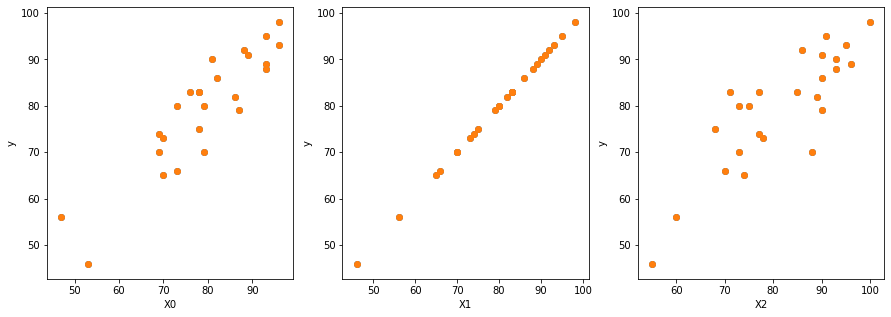

In [207]:
fig3, a1 = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Linear Regression multi varibles")

a1[0].scatter(x2[:,0], y2)
a1[0].scatter(x2[:,0], y_predicted2)
a1[0].set(xlabel='X0', ylabel='y')

a1[1].scatter(x2[:,1], y2)
a1[1].scatter(x2[:,1], y_predicted2)
a1[1].set(xlabel='X1', ylabel='y')

a1[2].scatter(x2[:,2], y2)
a1[2].scatter(x2[:,2], y_predicted2)
a1[2].set(xlabel='X2', ylabel='y')



Text(0, 0.5, 'Loss ')

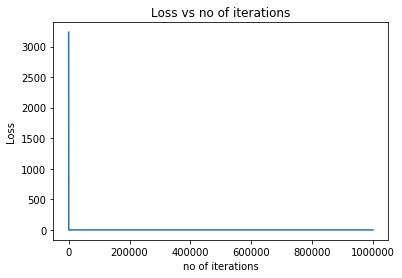

In [208]:
fig3 =  plt.figure(3)
plt.title('Loss vs no of iterations')
plt.plot(loss2)

plt.xlabel('no of iterations')
plt.ylabel('Loss ')

